

<h1 align=center><font size = 5>EDA Using SQL SpaceX<sup>(H.Y)</sup></font></h1>

## Introduction
1.  Understand the SpaceX DataSet
2.  Load the dataset  into the corresponding table in a DB2 database
3.  Execute SQL queries to answer the tasks


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



In [5]:
# !pip install sqlalchemy==2.0.39


In [6]:
# !pip install ipython-sql
# !pip install ipython-sql prettytable

### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [322]:
import sqlalchemy
import csv, sqlite3
import prettytable
import seaborn as sns
prettytable.DEFAULT = 'DEFAULT'
%load_ext sql
connection = sqlite3.connect("my_data1.db")
cursor = connection.cursor()
%sql sqlite:///my_data1.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [9]:
!pip install -q pandas

In [10]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", connection, if_exists='replace', index=False,method="multi")

101

### Optional 
<p> In this case, we use another data set, not like the one in <code>dataset_part_2 </code>. We have additional sites in this case </p>

1. Before we go to further SQL querying, let's save this dataset into Excel for further  
2. Let's also create a link to Excel

In [388]:
df.to_excel('Excel_part_2.xlsx',index = False)

In [390]:
from IPython.display import FileLink
FileLink('Excel_part_2.xlsx')

C:\Users\Justice for All\Excel_part_2.xlsx

**Note:This below code is added to remove blank rows from table**


In [16]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

<h5> create a new table that holds data were Date column is not NULL

In [17]:
%%sql 
create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [19]:
%sql select * from SPACEXTABLE limit 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>

In [21]:
%%sql
select distinct(Launch_Site) from SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


In [23]:
%%sql
select * from SPACEXTABLE where Launch_Site like'CCA%' limit 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [25]:
%%sql
select distinct(Customer) from SPACEXTABLE limit 5;

 * sqlite:///my_data1.db
Done.


Customer
SpaceX
NASA (COTS) NRO
NASA (COTS)
NASA (CRS)
MDA


In [26]:
%%sql
select sum(PAYLOAD_MASS__KG_) as Total_Payload_Mass from SPACEXTABLE
where Customer in('NASA (CRS)');

 * sqlite:///my_data1.db
Done.


Total_Payload_Mass
45596


### Task 4




##### Display average payload mass carried by booster version F9 v1.1


In [28]:
%%sql
select avg(PAYLOAD_MASS__KG_) as F9_V1_1_avg_payloadMass from SPACEXTABLE 
where Booster_Version like "F9 v1.1"

 * sqlite:///my_data1.db
Done.


F9_V1_1_avg_payloadMass
2928.4


## Note
My recommendation in the given table attributes there are a lot of Uderscores and Spaces so to make our search easier and so accountable, i would like to modify the name of all the attributes 
* ALTER TABLE table_name
RENAME COLUMN old_column_name TO new_column_name;
- the next function will show all the column names and their datatypes

In [30]:
%%sql 
PRAGMA table_info(SPACEXTABLE)


 * sqlite:///my_data1.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Date,TEXT,0,None,0
1,Time (UTC),TEXT,0,None,0
2,Booster_Version,TEXT,0,None,0
3,Launch_Site,TEXT,0,None,0
4,Payload,TEXT,0,None,0
5,PAYLOAD_MASS__KG_,INT,0,None,0
6,Orbit,TEXT,0,None,0
7,Customer,TEXT,0,None,0
8,Mission_Outcome,TEXT,0,None,0
9,Landing_Outcome,TEXT,0,None,0


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [32]:
%%sql
select distinct(Landing_Outcome) from SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Landing_Outcome
Failure (parachute)
No attempt
Uncontrolled (ocean)
Controlled (ocean)
Failure (drone ship)
Precluded (drone ship)
Success (ground pad)
Success (drone ship)
Success
Failure


In [33]:
%%sql 
-- this is a comment

select min(Date)as first_success_ground_pad from spacextable where Landing_Outcome in("Success (ground pad)")

 * sqlite:///my_data1.db
Done.


first_success_ground_pad
2015-12-22


In most SQL querying, we use comments to describe the query. We put # in front of the comment, and for a block of comments we use /* comment description */, but in the case of magic SQL, it is more preferable to us -- comment text

In [35]:

%%sql 
select  Date as first_success_ground_pad from spacextable where Landing_Outcome ="Success (ground pad)"
order by Date limit 1;

 * sqlite:///my_data1.db
Done.


first_success_ground_pad
2015-12-22


In [36]:

%%sql 
-- this query is an alternative of the above 
SELECT Date AS first_success_ground_pad 
FROM SPACEXTABLE 
WHERE Landing_Outcome ='Success (ground pad)'
ORDER BY Date ASC
LIMIT 1



 * sqlite:///my_data1.db
Done.


first_success_ground_pad
2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [38]:
%%sql 
-- unique Landing_Outcome
select distinct(Landing_Outcome) from spacextable 

 * sqlite:///my_data1.db
Done.


Landing_Outcome
Failure (parachute)
No attempt
Uncontrolled (ocean)
Controlled (ocean)
Failure (drone ship)
Precluded (drone ship)
Success (ground pad)
Success (drone ship)
Success
Failure


In [39]:
%%sql 
-- success in drone ship
-- payloadmass b/n 4000 and 6000
select Booster_Version from spacextable
where Landing_Outcome ="Success (drone ship)" 
AND PAYLOAD_MASS__KG_ between 4000 and 6000

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


### Task 7




##### List the total number of successful and failure mission outcomes


In [41]:
%%sql
select 
'Successful' as Attemps,
count(*) as Mission_Outcome from spacextable
where Mission_Outcome like'Success%'
union
select
'Failure' as Attemps,
count(*) as Mission_Outcome from spacextable
where Mission_Outcome not like'Success%';

 * sqlite:///my_data1.db
Done.


Attemps,Mission_Outcome
Failure,1
Successful,100


### Using CTE to get the total number of Successful and failure Mission Outcomes 

In [43]:
%%sql 
WITH outcome AS (
  SELECT 
    CASE 
      WHEN Mission_Outcome LIKE 'Success%' THEN 'Successful'
      ELSE 'Failure'
    END AS Attempts
  FROM spacextbl
)
SELECT Attempts, COUNT(*) AS Mission_Outcome
FROM outcome
GROUP BY Attempts


 * sqlite:///my_data1.db
Done.


Attempts,Mission_Outcome
Failure,1
Successful,100


### Task 8



##### List all the booster_versions that have carried the maximum payload mass, using a subquery with a suitable aggregate function.


In [45]:
%%sql
select Booster_Version from spacextable where PAYLOAD_MASS__KG_ in(select max(PAYLOAD_MASS__KG_) from spacextable);

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.**


In [47]:
%%sql
-- use the function length to find the length of a string 
-- so in the Date attribute the first 4 char is year then - then on the 6th the month starts so toget the month use substr function
-- select length(Date) from spacextable;
-- failure laning outcome in ron ship,booster version and launcesite for the months in year 2015
select substr(Date,6,2) as Month_of_2015,Booster_Version,Launch_Site  from spacextable
where Landing_Outcome like"Failure (drone ship)"
and substr(Date,0,5) = '2015';



 * sqlite:///my_data1.db
Done.


Month_of_2015,Booster_Version,Launch_Site
01,F9 v1.1 B1012,CCAFS LC-40
04,F9 v1.1 B1015,CCAFS LC-40


### Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


**NOTE**: Ranking of the count of landing 
outcomes between June 4, 2010 and 
March 3, 2017, in descending order <br>
**Optional** Use the lolliPop graph to represent the Landing outcomes on the given range of time 

In [383]:
%%sql
SELECT 
  Landing_Outcome, 
  COUNT(*) as Count, 
  RANK() OVER (ORDER BY COUNT(*) DESC) as Ranking
FROM 
  spacextable
WHERE Landing_outcome in 
  (select distinct(Landing_outcome) from spacextable) and
               Date BETWEEN '2010-06-04' AND '2017-03-20'
                   group by landing_Outcome
                   order by count desc


 * sqlite:///my_data1.db
Done.


Landing_Outcome,Count,Ranking
No attempt,10,1
Success (drone ship),5,2
Failure (drone ship),5,2
Success (ground pad),3,4
Controlled (ocean),3,4
Uncontrolled (ocean),2,6
Failure (parachute),2,6
Precluded (drone ship),1,8


In [426]:
%%sql
result << SELECT 
  Landing_Outcome, 
  COUNT(*) as Count, 
  RANK() OVER (ORDER BY COUNT(*) DESC) as Ranking
FROM 
  spacextable
WHERE Landing_outcome in 
  (select distinct(Landing_outcome) from spacextable) and
               Date BETWEEN '2010-06-04' AND '2017-03-20'
                   group by landing_Outcome
                   order by count desc

 * sqlite:///my_data1.db
Done.
Returning data to local variable result


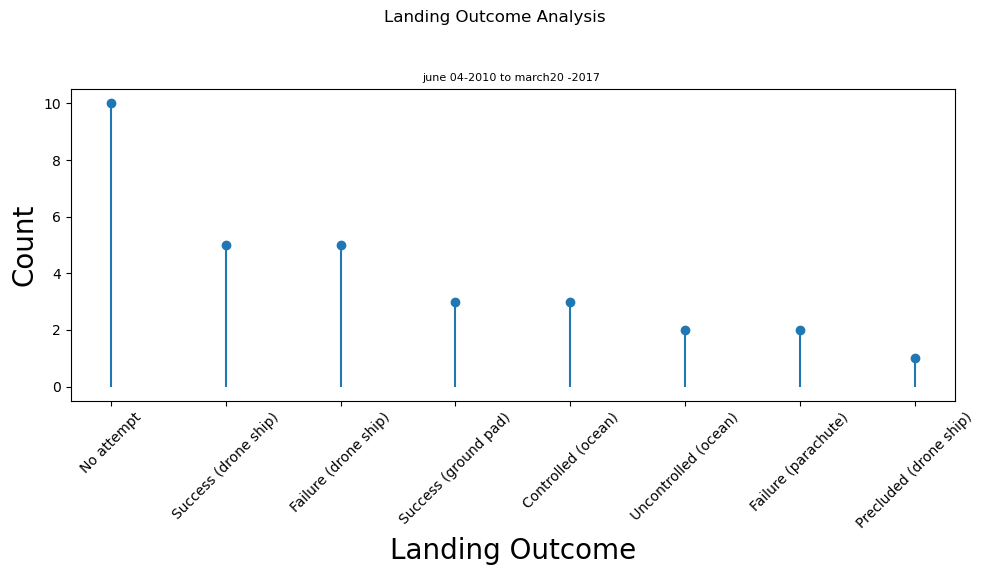

In [428]:
# Plot the lollipop chart
plt.figure(figsize=(10, 6))
plt.stem(df['Landing_Outcome'], df['Count'], linefmt='C0-', markerfmt='C0o', basefmt=' ')
plt.suptitle('Landing Outcome Analysis', fontsize=12)
plt.title('june 04-2010 to march20 -2017 ', fontsize=8)
plt.xlabel('Landing Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

This lollipop chart will show:

- Landing outcomes on the x-axis
- Counts on the y-axis

The lollipop chart effectively displays:

- Counts for each landing outcome
- Easy comparison between outcomes


## <center> Sample Data Visualizations</center>

### Task 11

<h5> Create a bar graph on Orbit based on the distribution of average payload mass

<center><h3> Orbit Vs Avg_PayloadMass Bar Graph</h3></center>

 * sqlite:///my_data1.db
Done.


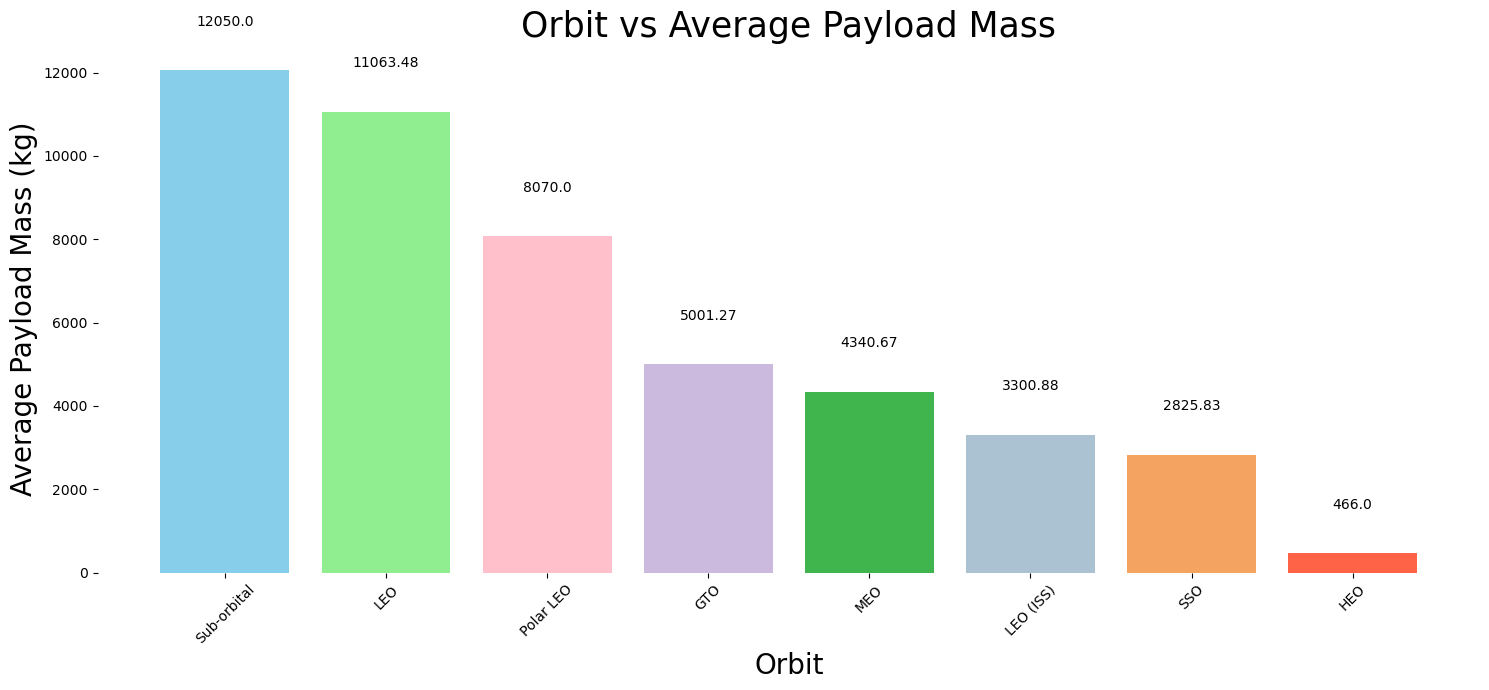

In [305]:
import matplotlib.pyplot as plt
import pandas as pd
result = %sql SELECT Orbit ,round(avg(PAYLOAD_MASS__KG_ ),2) as avg_payload_mass FROM spacextable group by Orbit order by avg_payload_mass desc ;
df = result.DataFrame()
plt.figure(figsize=(15,7))
plt.rc('axes', titlesize=25,labelsize  =20)
# put the average values on every bar 
for i, value in enumerate(df['avg_payload_mass']):
    plt.text(i, value + 1000, str(round(value, 2)), ha='center', va='bottom')
plt.bar(df['Orbit'], df['avg_payload_mass'],
        color=['skyblue', 'lightgreen', 'pink', '#ccbade', '#22aa33dd','#aac2d2','#F4A460','#FF6347'][:len(df['Orbit'])])
plt.xlabel('Orbit')
plt.ylabel('Average Payload Mass (kg)')
plt.title('Orbit vs Average Payload Mass')
plt.xticks(rotation=45) 
# Remove border
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
# save the figure
plt.savefig('orbit_vs_payload_mass.png', bbox_inches='tight', dpi=300)
plt.show()


This graph will show:

- Orbits on the x-axis
- Average payload mass on the y-axis

The graph helps identify:

- Orbits with highest/lowest average payload mass
- Distribution patterns


**Note** From the above graph, I see the sub-orbital orbit has the highest average payload mass in space due to its ability to carry multiple satellites or payloads simultaneously.

### Task 12

<h5> Create a Pie chart on Orbit based on its frequency in the dataset

### <center> PIE CHART <b><i> Orbit frequency</i><b></center>

In the next graph, we will see the Frequency of orbits in the dataset 
The<code> pie chart</code> provides a clear and concise visual representation of orbit frequencies, 
making it easy to compare and understand the data.
1. Each slice represents an orbit.
2. Slice size corresponds to the frequency of each orbit.
3. Labels display orbit names.
4. Percentages show the proportion of each orbit.




<h5> Before I create the graph, let's compare the code and see how graphs simply explain the data

In [330]:
%%sql
SELECT 
  Orbit, 
  COUNT(*) AS Frequency,
  ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM spacextbl), 2) AS Percentage
FROM 
  spacextbl
GROUP BY 
  Orbit
ORDER BY 
  Frequency DESC;


 * sqlite:///my_data1.db
Done.


Orbit,Frequency,Percentage
GTO,30,29.7
LEO (ISS),26,25.74
LEO,25,24.75
Polar LEO,8,7.92
SSO,6,5.94
MEO,3,2.97
HEO,2,1.98
Sub-orbital,1,0.99


**Note**
The << operator stores the query results in the result variable, which I can then use for visualization.


Data visualization can convey complex information clearly and concisely.

Code vs. Visualization:
A. Code: Provides exact numbers and calculations.
B. Visualization: Offers intuitive insights and patterns.

Pie Chart Benefits:

-  Easy comparison: Slice sizes visually represent proportions.
-  Pattern recognition: Quickly identifies dominant orbits.
-  Storytelling: Effectively communicates data insights.

By combining code and visualization, we can gain a deeper understanding of the data and communicate insights more effectively.<br>
**Insights:**
1. Dominant orbits
2. Distribution patterns
3. Relative frequencies


In [311]:
%%sql
result << SELECT 
  Orbit, 
  COUNT(*) AS Frequency
FROM 
  spacextable
GROUP BY 
  Orbit;

 * sqlite:///my_data1.db
Done.
Returning data to local variable result


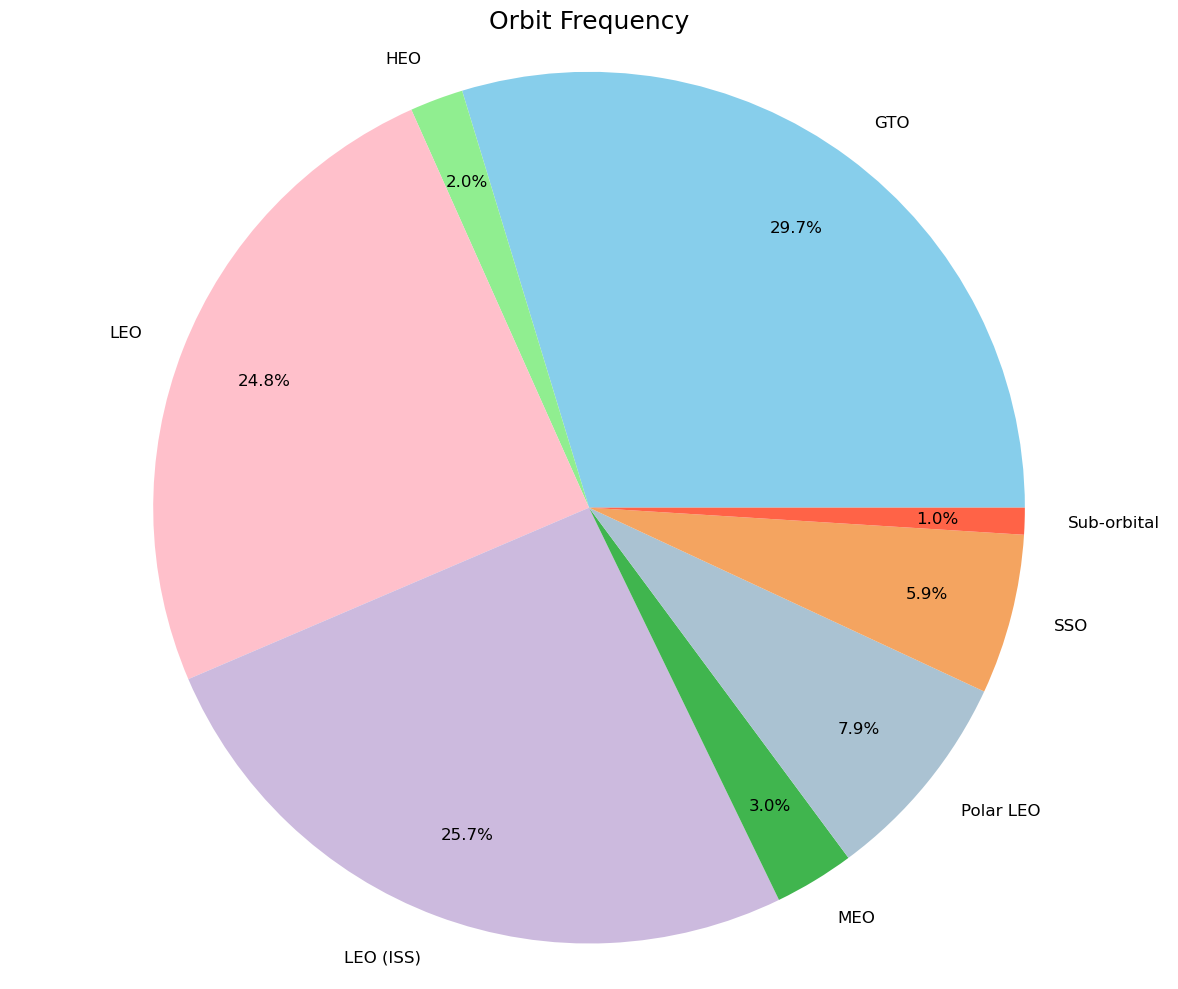

In [317]:
# Define custom colors
colors=['skyblue', 'lightgreen', 'pink', '#ccbade', '#22aa33dd','#aac2d2','#F4A460','#FF6347']

# get the result into a data frame 
df = result.DataFrame()
#set figure size
plt.figure(figsize=(12, 10))
# create pie chart 
plt.pie(df['Frequency'], labels=df['Orbit'], autopct='%1.1f%%', 
        textprops={'fontsize': 12}, pctdistance=0.8, labeldistance=1.1,colors=colors[:len(df['Orbit'])])
plt.title('Orbit Frequency', fontsize=18)
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.tight_layout()
plt.show()

## <center><i>Mission Success count vs Launch sites </i><center>

**This query:**<br>

- 1. Counts the number of successful missions for each launch site
- 2. Groups results by Launch_Site
- 3. Orders results by success count in descending order


### Task 13

<h5> Create a bar chart on Orbit based on the sum of Successfull Mission_Outcome as refer to the Launch sites

In [175]:
%%sql
result << WITH outcome AS (
  SELECT 
    Launch_Site,
    CASE WHEN Mission_Outcome LIKE 'Success%' THEN 1 ELSE 0 END AS Success
  FROM 
    spacextbl
),
site_outcome AS (
  SELECT 
    Launch_Site,
    SUM(Success) AS Success_Count
  FROM 
    outcome
  GROUP BY 
    Launch_Site
)
SELECT 
  Launch_Site,
  Success_Count
FROM 
  site_outcome
ORDER BY 
  Success_Count DESC;


 * sqlite:///my_data1.db
Done.
Returning data to local variable result


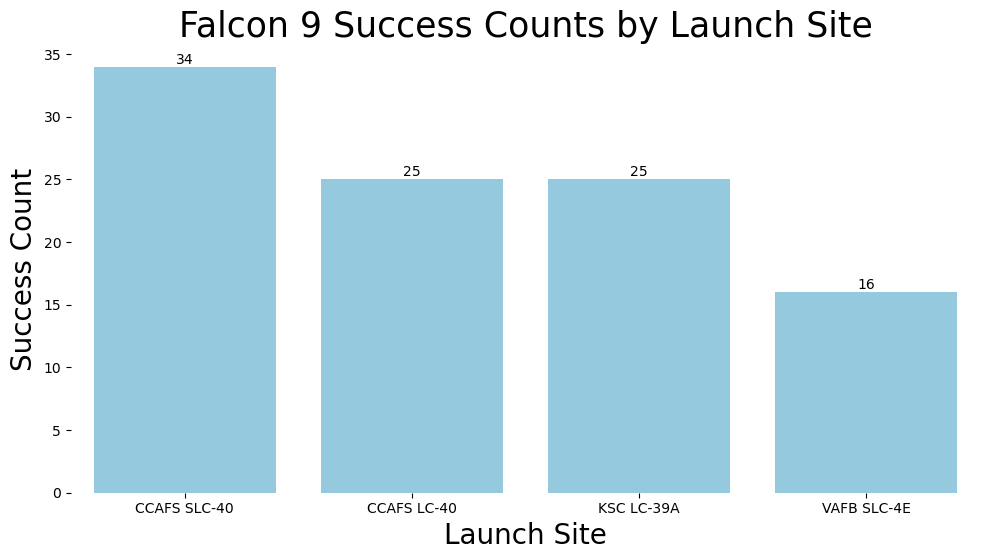

<Figure size 640x480 with 0 Axes>

In [193]:
plt.figure(figsize=(10, 6))
plt.rc('axes', titlesize=25,labelsize  =20)
sns.barplot(x='Launch_Site', y='Success_Count', data=result.DataFrame(),color ='skyblue')
plt.title('Falcon 9 Success Counts by Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Success Count')
# Add count values above each bar
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())),
                   ha='center', va='bottom')
# Remove border
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
# save the figure
plt.savefig('F9 Success_Count vs Launch_Site.png', bbox_inches='tight', dpi=300)
plt.show()

### Task 14

<h5> Create a heat map on the frequency of Launch site and Orbits 

## <center><i> Heat MapLaunch Site vs Orbit</i></center>

This heatmap will show:

- Launch sites on the y-axis
- Orbits on the x-axis
- Frequency of combinations as cell values

The heatmap helps identify:

- Popular launch site-orbit combinations
- Rare or unique combinations


In [374]:
# let's put this code into heatmap 
%%sql
SELECT 
  Launch_Site, 
  Orbit, 
  COUNT(*) AS Frequency
FROM 
  spacextable
GROUP BY 
  Launch_Site, Orbit;

 * sqlite:///my_data1.db
Done.


Launch_Site,Orbit,Frequency
CCAFS LC-40,GTO,11
CCAFS LC-40,HEO,1
CCAFS LC-40,LEO,3
CCAFS LC-40,LEO (ISS),11
CCAFS SLC-40,GTO,10
CCAFS SLC-40,HEO,1
CCAFS SLC-40,LEO,11
CCAFS SLC-40,LEO (ISS),8
CCAFS SLC-40,MEO,3
CCAFS SLC-40,SSO,1


In [366]:
%%sql
result << SELECT 
  Launch_Site, 
  Orbit, 
  COUNT(*) AS Frequency
FROM 
  spacextable
GROUP BY 
  Launch_Site, Orbit;

 * sqlite:///my_data1.db
Done.
Returning data to local variable result


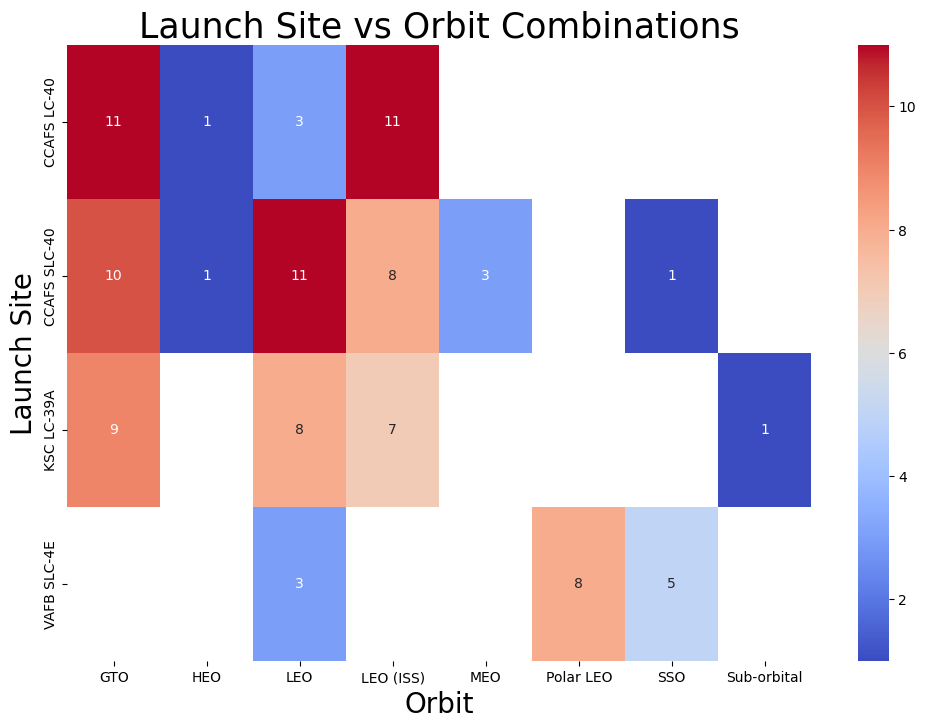

In [368]:
df = result.DataFrame()

# Pivot the data
pivot_df = df.pivot(index='Launch_Site', columns='Orbit', values='Frequency')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='g')
plt.title('Launch Site vs Orbit Combinations')
plt.xlabel('Orbit')
plt.ylabel('Launch Site')
plt.show()

 * sqlite:///my_data1.db
Done.
(sqlite3.OperationalError) near "df": syntax error
[SQL: df = result.DataFrame()

# Pivot the data
pivot_df = df.pivot(index='Launch_Site', columns='Orbit', values='Frequency')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='g')
plt.title('Launch Site vs Orbit Combinations')
plt.xlabel('Orbit')
plt.ylabel('Launch Site')
plt.show()]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [356]:
%%sql
result << SELECT 
  Launch_Site, 
  Orbit, 
  COUNT(*) AS Frequency
FROM 
  spacextable
GROUP BY 
  Launch_Site, Orbit;


# Get the result as a DataFrame
df = result.DataFrame()

# Pivot the data
pivot_df = df.pivot(index='Launch_Site', columns='Orbit', values='Frequency')



 * sqlite:///my_data1.db
Done.
(sqlite3.OperationalError) unrecognized token: "#"
[SQL: # Get the result as a DataFrame
df = result.DataFrame()

# Pivot the data
pivot_df = df.pivot(index='Launch_Site', columns='Orbit', values='Frequency')]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


## **Next Objectives** 

CCAFS LC-40 has a success rate of 60%, while KSC LC-39A and VAFB SLC 4E have a success rate of around 77%. Combining attributes also gives us more information. If we overlay the result of the landing outcomes as a color we see that CCAFS LC-40, has a success rate of 60%, but if the mass is above 10,000 kg the success rate is 100%. Therefore, we will combine multiple features.

### Reference Links

* <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>  

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*  <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb">Hands-on Lab: Analyzing a real World Data Set</a>




<!--
## Change log
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2024-07-10 | 1.1 |Anita Verma | Changed Version|
| 2021-07-09 | 0.2 |Lakshmi Holla | Changes made in magic sql|
| 2021-05-20 | 0.1 |Lakshmi Holla | Created Initial Version |
-->
